In [1]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import pylab 

# This allows plots to appear directly in the notebook
%matplotlib inline

In [3]:
Cleaned_Data = pd.read_pickle('../Cleaned_Method_Wise_Data/DecisionTreeClassifier_cleaned.tsv.gz')
Cleaned_Data.head()

,Dataset_Name,Method_Name,Test_Score,max_depth,max_features,criterion
0,cars1,DecisionTreeClassifier,0.724490,4,0.1,entropy
1,cars1,DecisionTreeClassifier,0.693878,4,0.1,entropy
2,cars1,DecisionTreeClassifier,0.704082,4,0.1,entropy
3,cars1,DecisionTreeClassifier,0.744898,4,0.1,entropy
4,cars1,DecisionTreeClassifier,0.755102,4,0.1,entropy


In [ ]:
Cleaned_Data.shape

In [4]:
Cleaned_Data['criterion_bitwise'] = Cleaned_Data.criterion.map({'gini':0, 'entropy':1})
Cleaned_Data.head()

,Dataset_Name,Method_Name,Test_Score,max_depth,max_features,criterion,criterion_bitwise
0,cars1,DecisionTreeClassifier,0.724490,4,0.1,entropy,1
1,cars1,DecisionTreeClassifier,0.693878,4,0.1,entropy,1
2,cars1,DecisionTreeClassifier,0.704082,4,0.1,entropy,1
3,cars1,DecisionTreeClassifier,0.744898,4,0.1,entropy,1
4,cars1,DecisionTreeClassifier,0.755102,4,0.1,entropy,1


# Trials to plot Parameters against the Test Score

28860


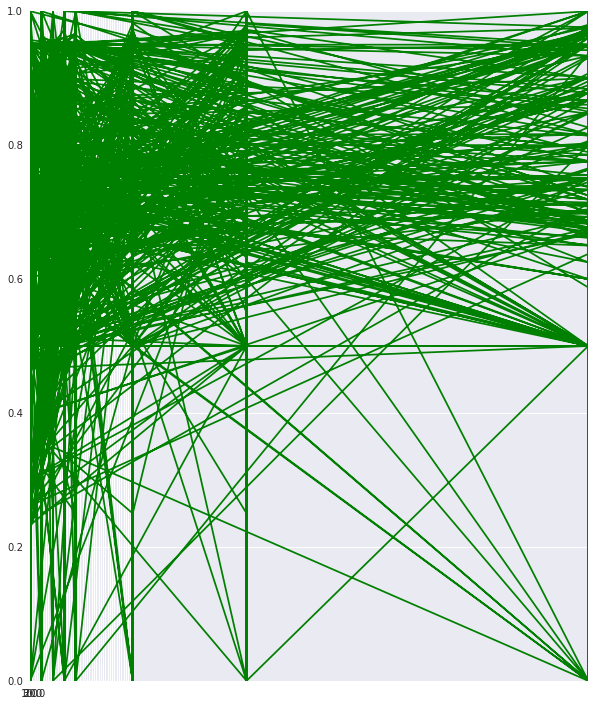

In [45]:
# Try to plot the parameters with the test score to understand the impact

max_depth=Cleaned_Data['max_depth'].tolist()
max_depth_unique= pd.unique(Cleaned_Data.max_depth.ravel())
Dataset_Name_unique=pd.unique(Cleaned_Data.Dataset_Name.ravel())
Test_Score = Cleaned_Data['Test_Score'].tolist()
length=len(max_depth_unique)
count=Cleaned_Data.criterion.value_counts()
print (len(Cleaned_Data.criterion))


x=range(length)
plt.figure(figsize=(10,12))
x = np.arange(0, 10, 0.2)
pylab.xticks(x, max_depth_unique)
pylab.plot(max_depth,Test_Score,"g")

In [26]:
Cleaned_Data['max_depth']=Cleaned_Data['max_depth'].astype(float)
max_depth_unique= pd.unique(Cleaned_Data.max_depth.ravel())
max_features_unique= pd.unique(Cleaned_Data.max_features.ravel())
print(max_features_unique)
#dt=float(max_features_unique)
print(max_depth_unique)

['0.1' 'log2' 'sqrt' '0.75' '0.5' '0.25']
[  4.   5.   2.  50.   1.   3.  10.  20.]


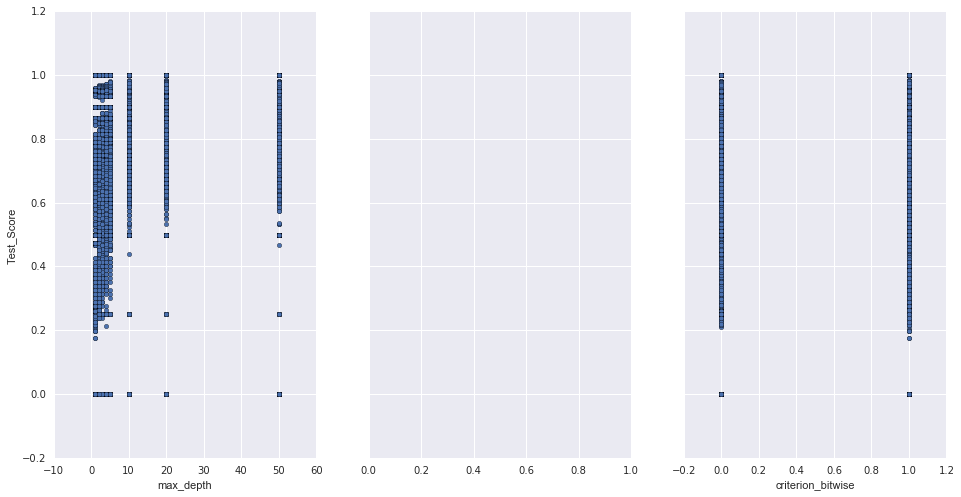

In [42]:
fig, axs = plt.subplots(1, 3, sharey=True)
Cleaned_Data.plot(kind='scatter', x='max_depth', y='Test_Score', ax=axs[0], figsize=(16, 8))
#Cleaned_Data.plot(kind='scatter', x='max_features', y='Test_Score', ax=axs[1])
Cleaned_Data.plot(kind='scatter', x='criterion_bitwise', y='Test_Score', ax=axs[2])

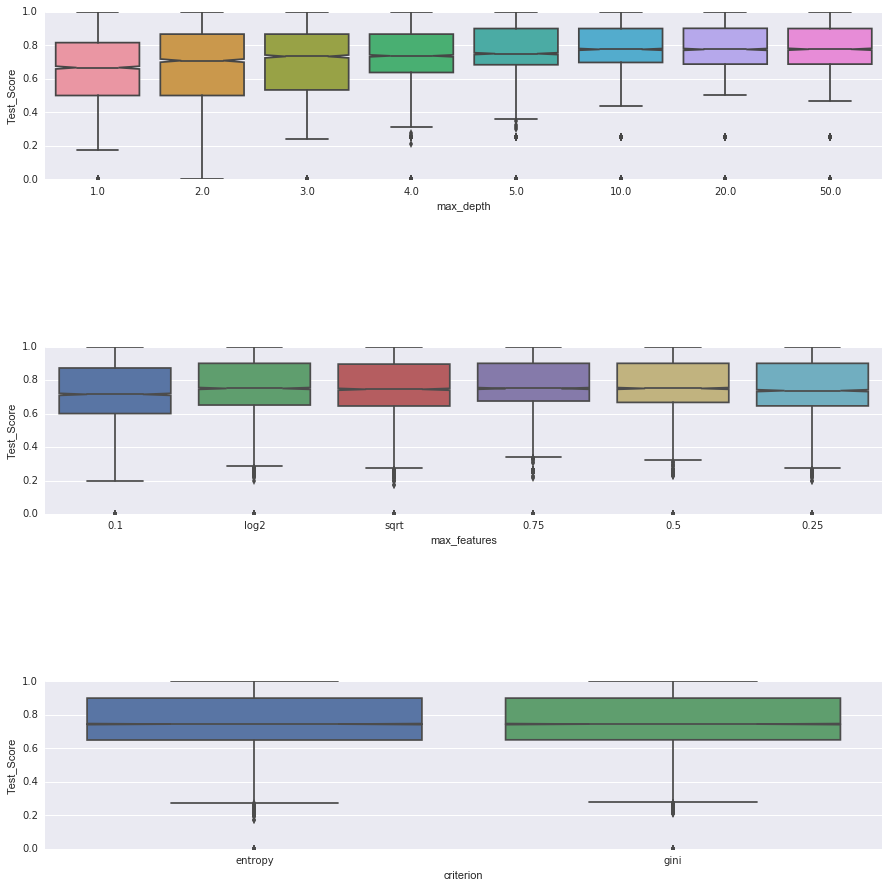

In [58]:
import seaborn as sns
sns.set()
fig, axs = plt.subplots(3,1, sharey=True, figsize=(15,15)) # 3 rows 1 column, figsize controls how big I want the fig to look
fig.subplots_adjust(hspace=1) # Give space between the subplots

#boxplots
sns.boxplot(data=Cleaned_Data, x='max_depth', y='Test_Score', notch='T',ax=axs[0])
sns.boxplot(data=Cleaned_Data, x='max_features', y='Test_Score', notch='T',ax=axs[1])
sns.boxplot(data=Cleaned_Data, x='criterion', y='Test_Score', notch='T',ax=axs[2])

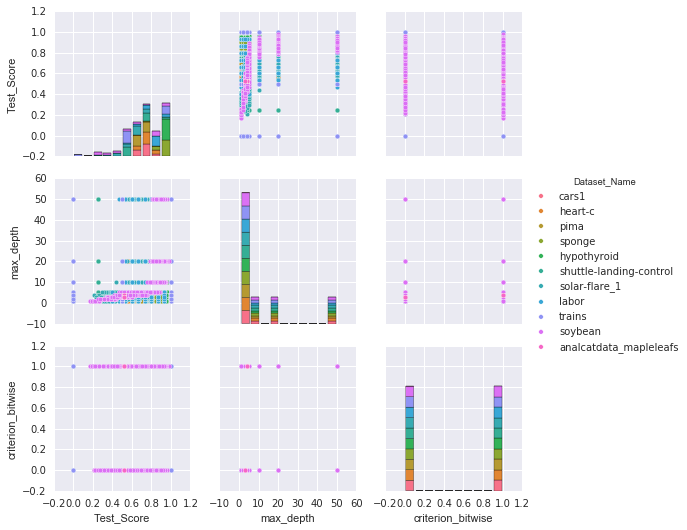

In [57]:
#pairplot
sns.pairplot(Cleaned_Data, hue="Dataset_Name")

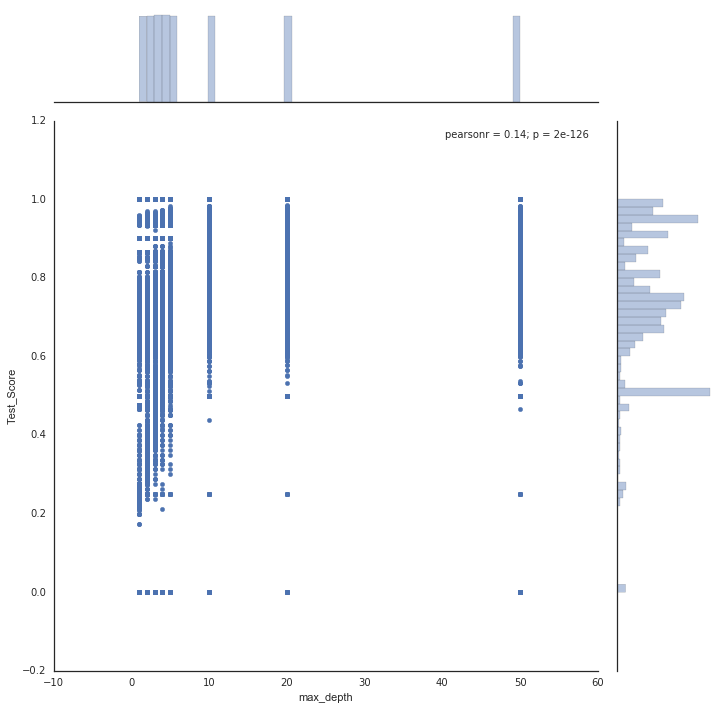

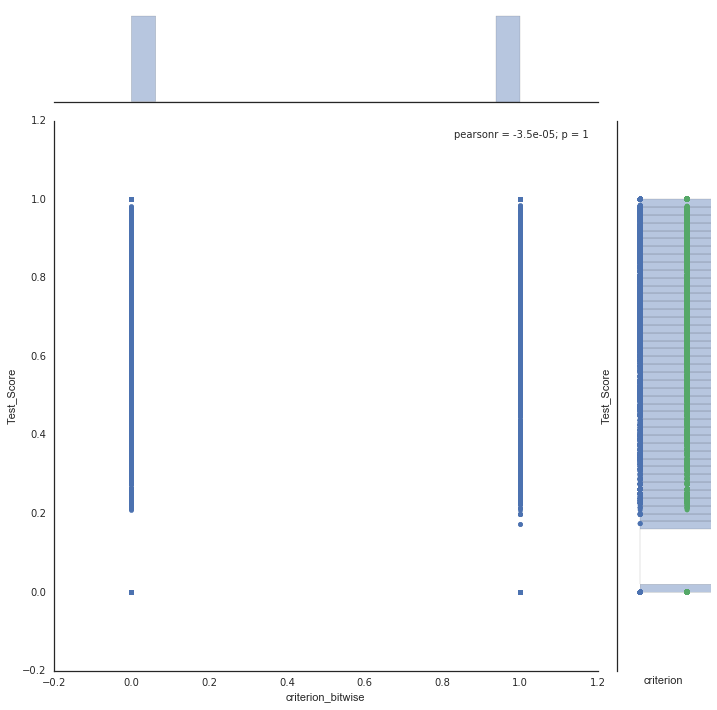

In [70]:
# scatter plot

sns.set(style="white", color_codes=True)
sns.jointplot(x="max_depth", y="Test_Score", data=Cleaned_Data, kind="scatter", size=10)
#sns.jointplot(x="max_features", y="Test_Score", data=Cleaned_Data, kind="scatter", size=10)
sns.jointplot(x="criterion_bitwise", y="Test_Score", data=Cleaned_Data, kind="scatter", size=10)

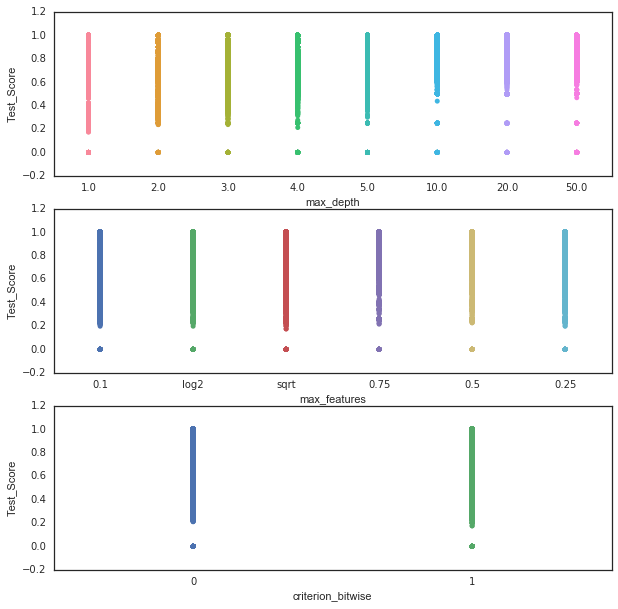

In [76]:
# Best for categorical variable or string type entry

fig, axs = plt.subplots(3,1, sharey=True, figsize=(10,10))

sns.stripplot(x="max_depth", y="Test_Score", data=Cleaned_Data, ax=axs[0])
sns.stripplot(x="max_features", y="Test_Score", data=Cleaned_Data, ax=axs[1])
sns.stripplot(x="criterion_bitwise", y="Test_Score", data=Cleaned_Data, ax=axs[2])


Analysis here:

# Linear Regression on combined dataset

In [78]:
import statsmodels.formula.api as smf

lm = smf.ols(formula='Test_Score ~ max_depth + max_features + criterion', data=Cleaned_Data).fit()
lm.params
lm.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Test_Score   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     102.6
Date:                Wed, 23 Mar 2016   Prob (F-statistic):          5.59e-149
Time:                        20:50:53   Log-Likelihood:                 7316.2
No. Observations:               28860   AIC:                        -1.462e+04
Df Residuals:                   28852   BIC:                        -1.455e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------
Intercept                0.6875      0.003    225.583      0.000         0.682     0.693
max_features[T.0.25]     0.0222      0.004      5.778      0.000         0.015     0.030
max_features[T.0.5]      0.0352      0.004      9.186      0.000         0.028     0.043
max_features[T.0.75]     0.0415      0.004     10.819      0.000         0.034     0.049
max_features[T.log2]     0.0264      0.004      6.904      0.000         0.019     0.034
max_features[T.sqrt]     0.0231      0.004      6.033      0.000         0.016     0.031
criterion[T.gini]     2.376e-05      0.002      0.011      0.991        -0.004     0.004
max_depth                0.0017   7.13e-05     24.092      0.000         0.002     0.002
==============================================================================
Omnibus:                     3508.448   Durbin-Watson:                   0.900
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5574.147
Skew:                          -0.864   Prob(JB):                         0.00
Kurtosis:                       4.286   Cond. No.                         126.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# ASK RANDY

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

Column_Names=list(Cleaned_Data) # Gives the names of the columns in the dataframe
X=['max_depth','max_features','criterion']
Y=['Test_Score']
X_new = SelectKBest(chi2, k=2).fit_transform(X, Y) 

Analysis

# Dividing the dataframe into independent datasets

In [107]:
Dataset_list=Cleaned_Data['Dataset_Name'].unique().tolist()
print(Dataset_list)
DatasetWiseData={}
for Dataset_name in Dataset_list:
    DatasetWiseData[Dataset_name] = Cleaned_Data[Cleaned_Data.Dataset_Name==Dataset_name]
    

['cars1', 'heart-c', 'pima', 'sponge', 'hypothyroid', 'shuttle-landing-control', 'solar-flare_1', 'labor', 'trains', 'soybean', 'analcatdata_mapleleafs']


In [128]:
# Save the file

import os
#os.mkdir('../Cleaned_Method_Wise_Data/DecisionTreeClassifier_cleaned')
DatasetWiseData['cars1'].to_pickle('../Cleaned_Method_Wise_Data/DecisionTreeClassifier_cleaned/cars1.tsv.gz')

In [ ]:
# Read the file

Dataset_DTC_Type = pd.read_pickle('../Cleaned_Method_Wise_Data/DecisionTreeClassifier_cleaned/cars1.tsv.gz')
print(Dataset_DTC_Type)

# Plot and Linear Regression Analysis performed dataset wise

In [ ]:


Dataset_Cleaned_Data = pd.read_pickle('../Cleaned_Method_Wise_Data/DecisionTreeClassifier_cleaned/cars1.tsv.gz')
Dataset_Cleaned_Data.head()

#boxplots
fig, axs = plt.subplots(3,1, sharey=True, figsize=(15,15)) # 3 rows 1 column, figsize controls how big I want the fig to look
fig.subplots_adjust(hspace=1) # Give space between the subplots
sns.boxplot(data=Dataset_Cleaned_Data, x='max_depth', y='Test_Score', notch='T',ax=axs[0])
sns.boxplot(data=Dataset_Cleaned_Data, x='max_features', y='Test_Score', notch='T',ax=axs[1])
sns.boxplot(data=Dataset_Cleaned_Data, x='criterion', y='Test_Score', notch='T',ax=axs[2])


In [ ]:


Dataset_Cleaned_Data = pd.read_pickle('../Cleaned_Method_Wise_Data/DecisionTreeClassifier_cleaned/cars1.tsv.gz')
Dataset_Cleaned_Data.head()

#stripplots
fig, axs = plt.subplots(3,1, sharey=True, figsize=(10,10))
sns.stripplot(x="max_depth", y="Test_Score", data=Dataset_Cleaned_Data, ax=axs[0])
sns.stripplot(x="max_features", y="Test_Score", data=Dataset_Cleaned_Data, ax=axs[1])
sns.stripplot(x="criterion_bitwise", y="Test_Score", data=Dataset_Cleaned_Data, ax=axs[2])


In [ ]:


Dataset_Cleaned_Data = pd.read_pickle('../Cleaned_Method_Wise_Data/DecisionTreeClassifier_cleaned/cars1.tsv.gz')
Dataset_Cleaned_Data.head()

#linear regression
lm = smf.ols(formula='Test_Score ~ max_depth + max_features + criterion', data=Dataset_Cleaned_Data).fit()
lm.params
lm.summary()


Analysis

analcatdata_mapleleafs.tsv.gz
cars1.tsv.gz
heart-c.tsv.gz
hypothyroid.tsv.gz
labor.tsv.gz
pima.tsv.gz
shuttle-landing-control.tsv.gz
solar-flare_1.tsv.gz
soybean.tsv.gz
sponge.tsv.gz
trains.tsv.gz


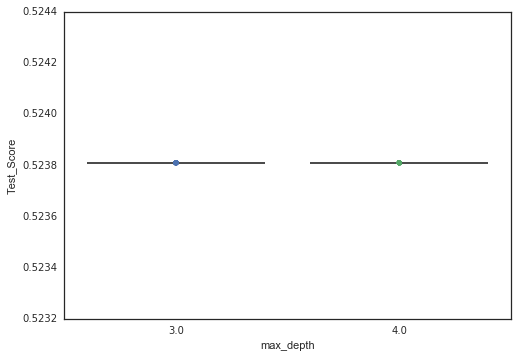

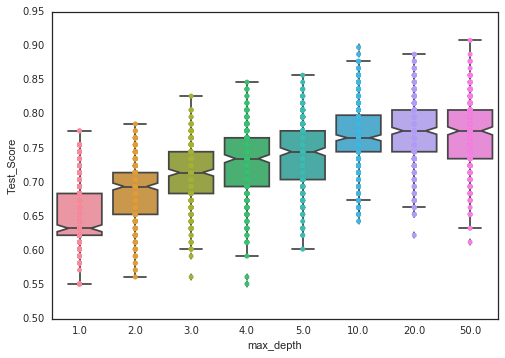

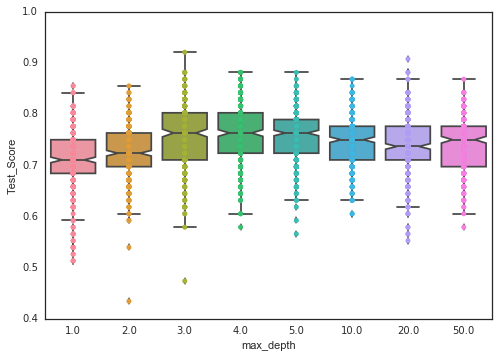

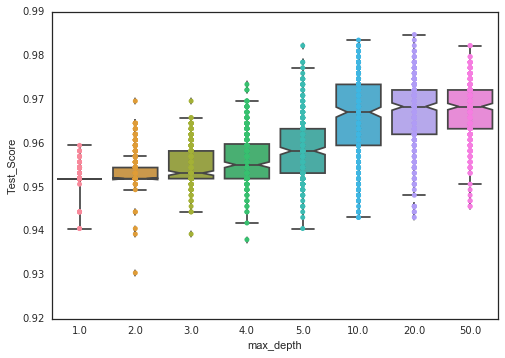

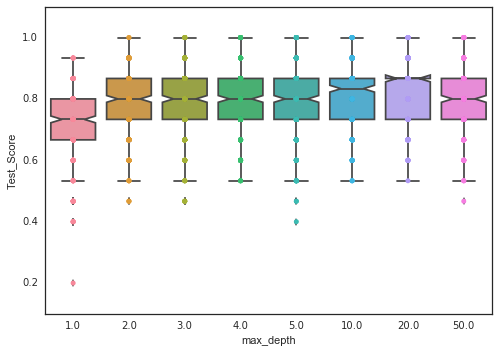

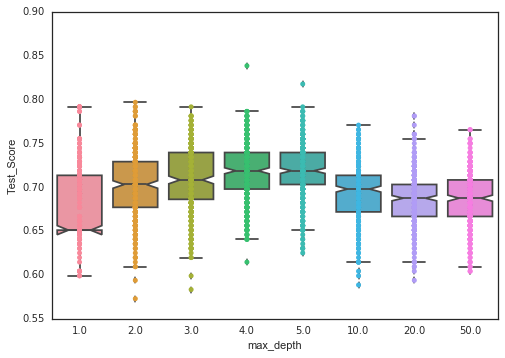

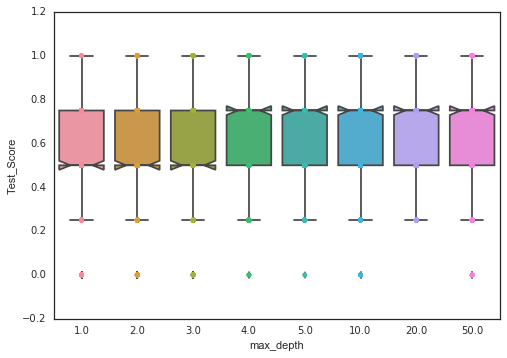

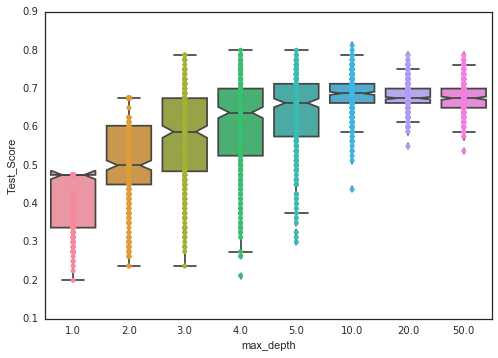

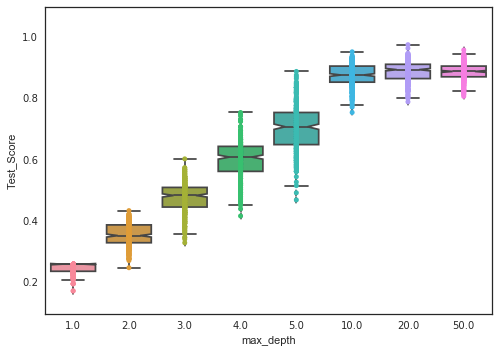

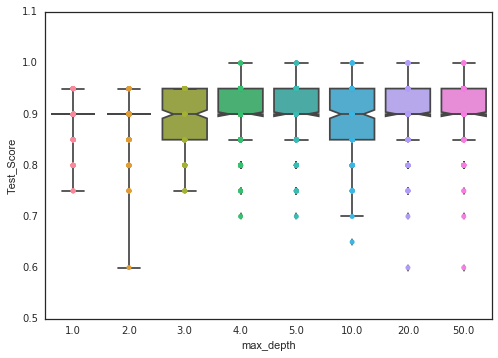

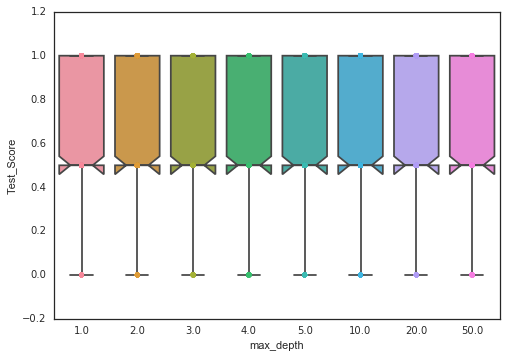

In [178]:
# Loop through the entire files in the folder, open then and run the codes....

indir = '../Cleaned_Method_Wise_Data/DecisionTreeClassifier_cleaned/'
for root, dirs, filenames in os.walk(indir):
     for f in filenames:
        print(f)
        #Dataset_Cleaned_Data = open(indir + Dataset_Cleaned_Data, 'r')
        #Dataset_Cleaned_Data =pd.read_csv(indir + f, sep='/t')
        Dataset_Cleaned_Data = pd.read_pickle(indir+f)
        #with open(indir + Dataset_Cleaned_Data, encoding='latin-1') as text_file:
        #for lines in text_file:
        #Dataset_Cleaned_Data = text_file.read()
        #print(Dataset_Cleaned_Data)
        plt.figure()   
        sns.boxplot(data=Dataset_Cleaned_Data, x='max_depth', y='Test_Score', notch='T')
        sns.stripplot(x="max_depth", y="Test_Score", data=Dataset_Cleaned_Data)
        lm = smf.ols(formula='Test_Score ~ max_depth + max_features + criterion', data=Dataset_Cleaned_Data).fit()